In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
df = pd.read_csv('/Users/jz/Downloads/job_data/2/df_update.csv',index_col=[0])

In [75]:
df = df.drop(columns=['job_title','company','location'])

In [76]:
df.head()

,rating,low_salary_year($),high_salary_year($),reviews,datepost,lat,lon,Is_DA,.Net,ACH,...,UX,Unity,VersionOne,Visio,Visual Basic,Windows,WordPress,Workday,XML,iOS
0,NaN,0,0,NaN,30.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0,0,NaN,30.0,0.000000,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.5,0,0,2.0,30.0,40.712728,-74.006015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,0,0,2.0,30.0,40.712728,-74.006015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,0,0,754.0,30.0,40.789624,-73.959894,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_7 = df[['rating','low_salary_year($)','high_salary_year($)','reviews','datepost','lat','lon']]

In [78]:
df_7 = df_7.fillna(0)

In [79]:
skill_list = list(df.columns[8:])

In [80]:
skill_list[:5]

['.Net', 'ACH', 'AI', 'AWS', 'Accounting']

In [81]:
df_7['low_salary_year($)'] = pd.to_numeric(df_7['low_salary_year($)'],errors='coerce')
df_7['high_salary_year($)'] = pd.to_numeric(df_7['high_salary_year($)'],errors='coerce')

In [82]:
feature_names = list(df_7.drop(columns=['rating']).columns)

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


RMSE: 1.4813841504143452


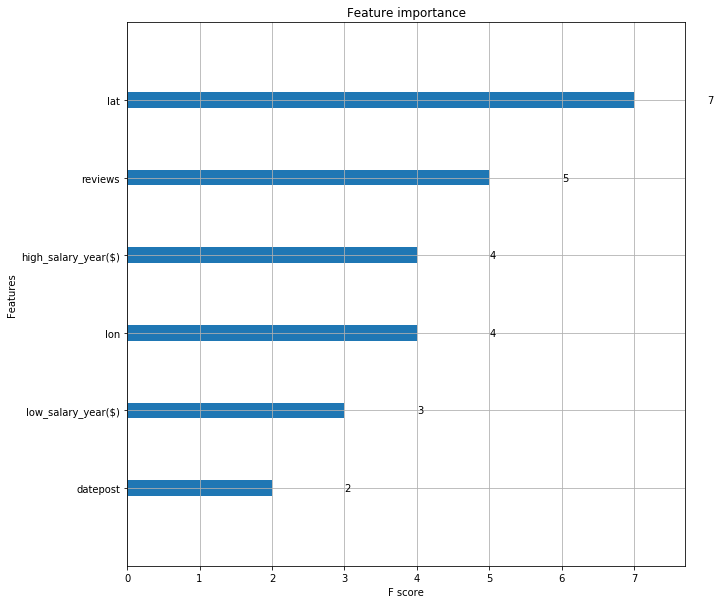

In [85]:
X = df_7[feature_names]
y = df_7['rating']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print('RMSE:',np.sqrt(mse))

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.show()

In [86]:
df_feature = pd.DataFrame(xg_reg.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

In [87]:
df_feature = df_feature.reset_index().drop(columns='index')

In [88]:
feature_sel = []
for row in np.arange(0,len(df_feature)):
    feat = df_feature['feature'][row]
    feature_sel.append(feat)

In [90]:
def accuracy_list(y_col,filtered_df,feature_sel):
    
    for i in np.arange(1,len(feature_sel)):
        print (accuracy(filtered_df,feature_sel[:i]))

In [91]:
X = df_7[feature_sel]
Y = df_7['low_salary_year($)']
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print (len(feature_sel),accuracy * 100.0)

6 97.63157894736842


In [93]:
X_test_input = [[0,0,0,0,0,1]]

In [102]:
X_test[:1]

,lat,reviews,lon,high_salary_year($),low_salary_year($),datepost
1061,40.760716,55.0,-73.966962,0,0,3.0


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X = df_7[feature_sel]
y = df_7['low_salary_year($)']
# fit final model
model = LinearRegression()
model.fit(X, y)
model.scores()

AttributeError: 'LinearRegression' object has no attribute 'scores'

In [116]:
# define one new data instance
Xnew = [[0,50,0,10000,100000,1]]
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[0, 50, 0, 10000, 100000, 1], Predicted=100000.00000000009
